In [90]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import corner


file = "./model/pyblastafterglow_raw_data_unprocessed.h5"

In [13]:
with h5py.File(file, 'r') as f:
    times = f["times"][:]
    nus = f["nus"][:]
    val_X_raw = f["val"]["X"][:]
    val_y_raw = f["val"]["y"][:]

In [21]:
where  = np.where(np.isinf(val_y_raw.reshape(-1, len(nus), len(times) )))

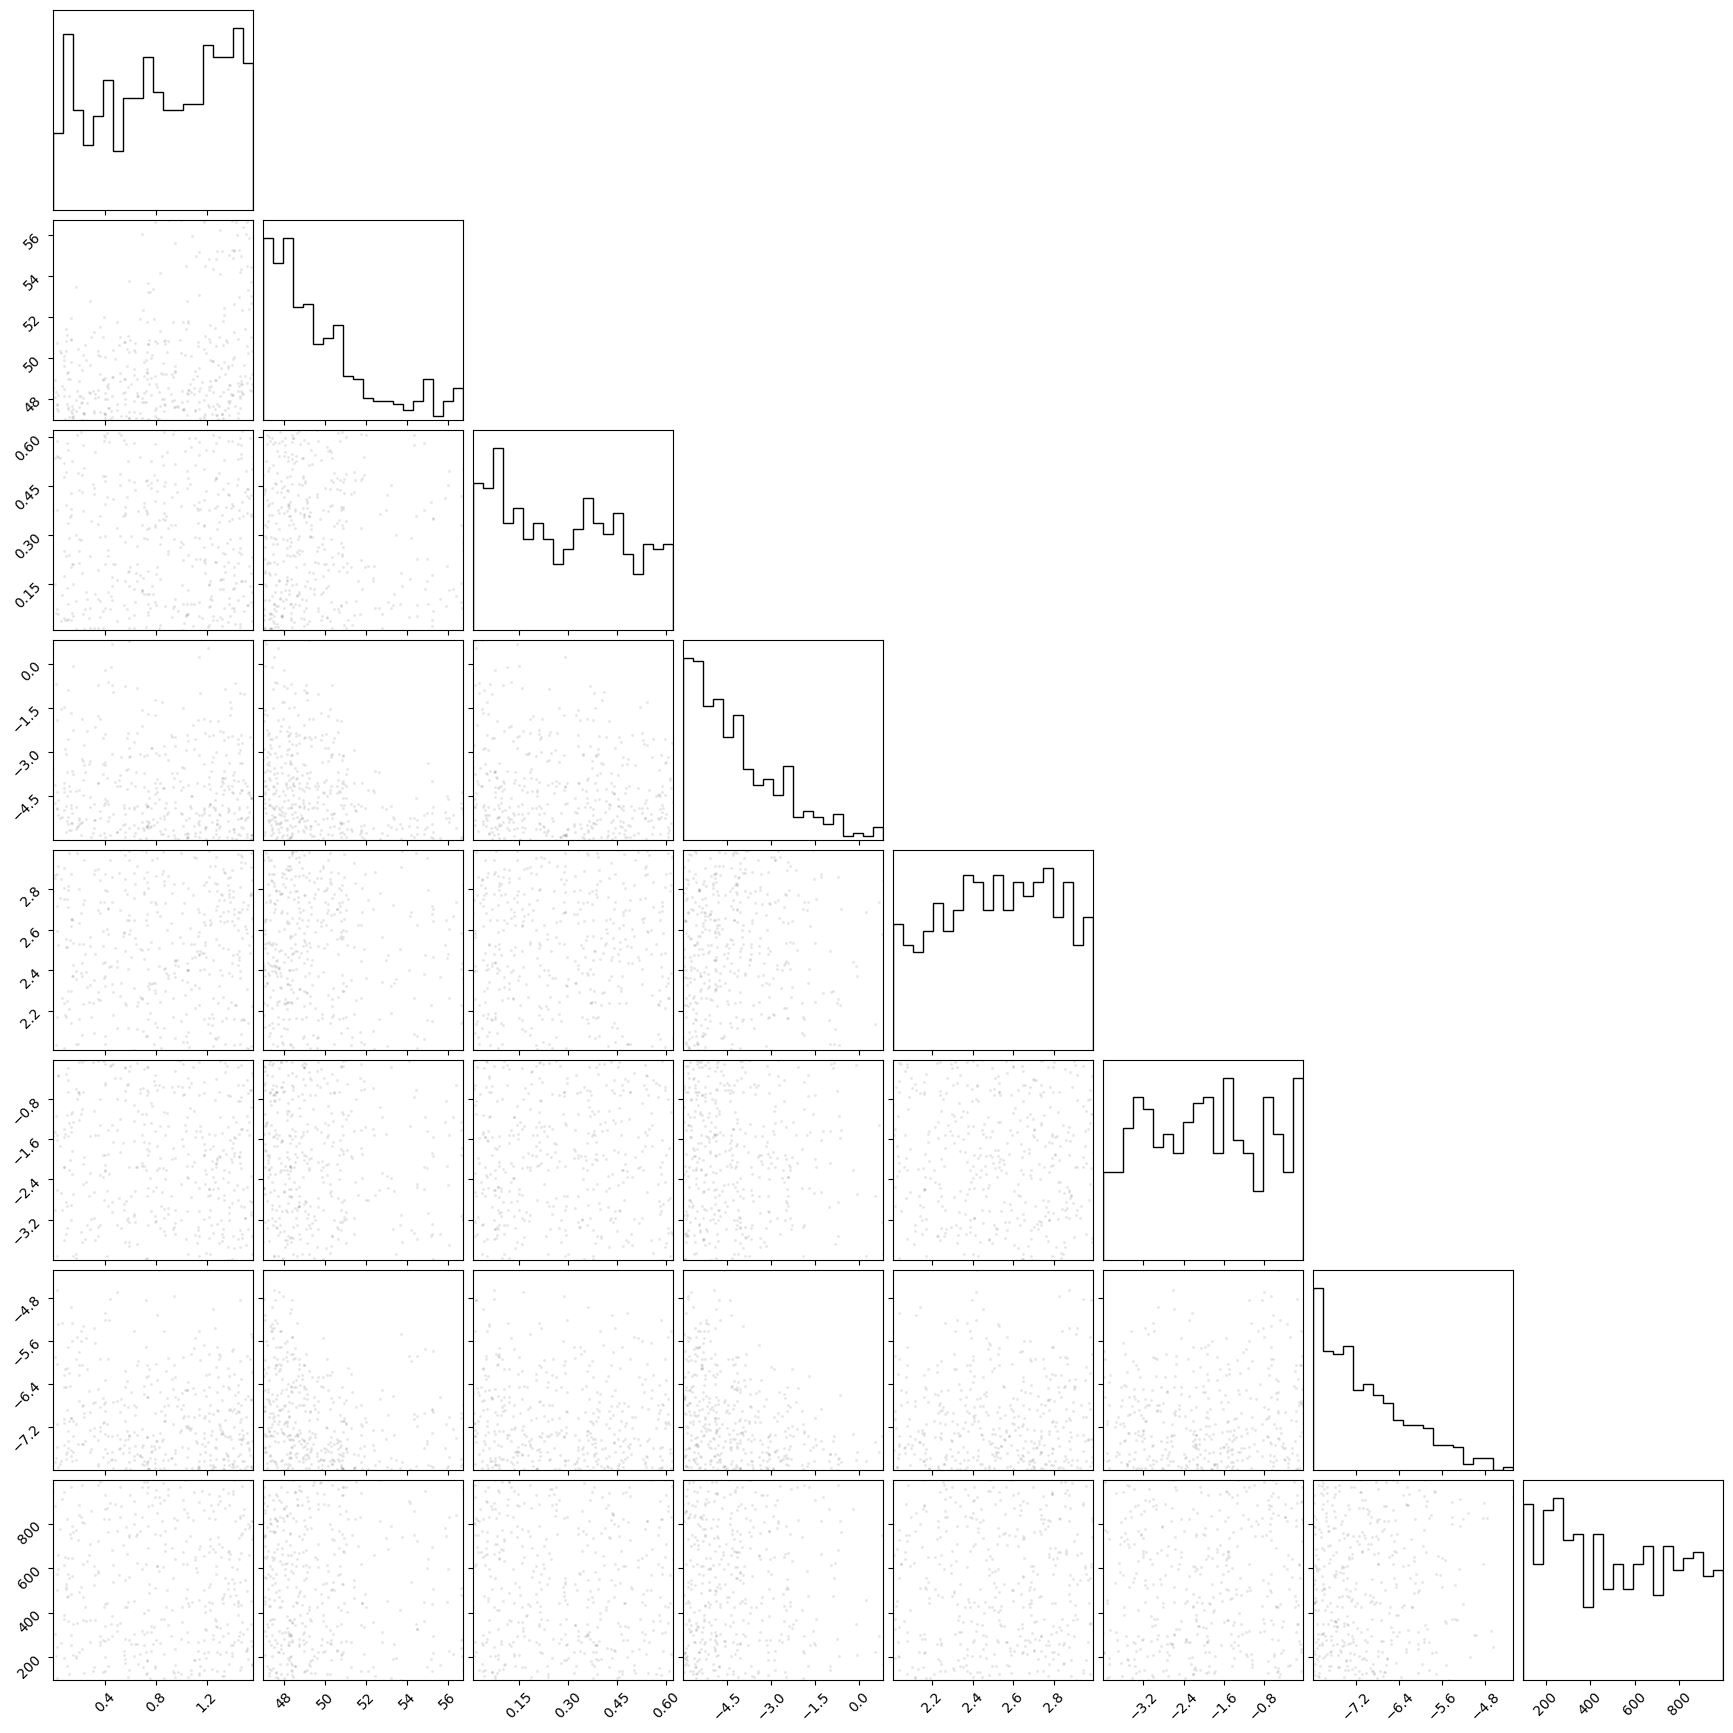

In [93]:
corner.corner(val_X_raw[np.unique(where[0])],
              plot_data_points = True, plot_density = False, plot_contours=  False)
plt.show()

(-60.0, 20.0)

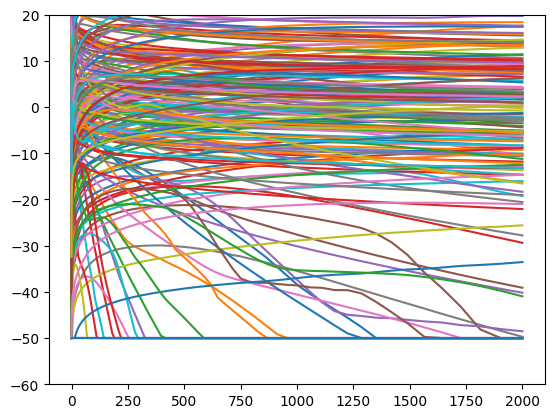

In [137]:
for j in range(400, 600):
    mJys = val_y_raw[j].reshape(len(nus), len(times))
    plt.plot(times, mJys[231])

plt.ylim(-60, 20)

In [120]:
val_X_raw[5163]

array([ 4.94770076e-01,  5.31203899e+01,  2.54337189e-02, -2.69929340e+00,
        2.72182148e+00, -3.62738556e+00, -8.72977141e-01,  2.04114352e+02])

In [58]:
val_X_raw[2]

array([  1.36903947,  56.26916428,   0.13500952,   1.31111351,
         2.32298317,  -1.2328051 ,  -4.79008766, 100.20328419])

In [138]:
for data in ["train"]:

    with h5py.File(file, "r") as f:
        y_raw = f[data]["y"][:]
    
    y_processed = y_raw.copy()
    y_raw[y_raw<-50] = -50.

    with h5py.File("./model/pyblastafterglow_raw_data.h5", "r+") as f:
        f[data]["y"][...] = y_raw
    
    

In [136]:
with h5py.File("./model/pyblastafterglow_raw_data.h5", "r") as f:
    val_y_raw  = f["val"]["y"][:]

val_y_raw.max()

54.12448524165835